<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/LinearRegression_RandomForestAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression R²: 0.9920 | RMSE: 512.44
Random Forest R²: 0.9980 | RMSE: 253.58


<ipython-input-1-a8db9fc51078>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coef_df_lr, palette="coolwarm")
<ipython-input-1-a8db9fc51078>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coef_df_rf, palette="viridis")


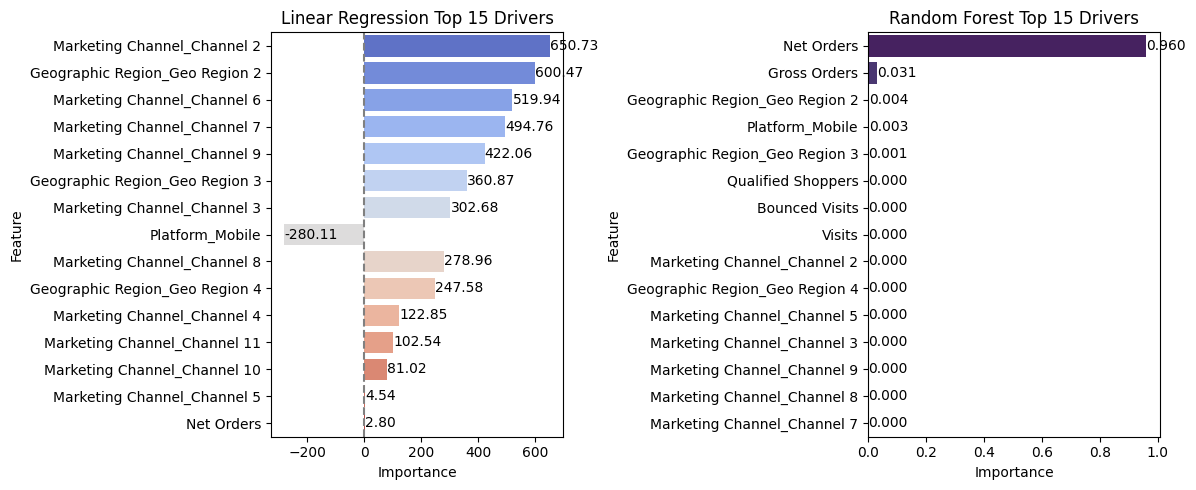

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# Define features and target
X = df.drop(columns=["Net Room Nights", "Date"])
y = df["Net Room Nights"]

categorical_cols = ["Geographic Region", "Platform", "Marketing Channel"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression pipeline ###
pipeline_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

### Random Forest pipeline ###
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Linear Regression R²: {r2_lr:.4f} | RMSE: {rmse_lr:.2f}")
print(f"Random Forest R²: {r2_rf:.4f} | RMSE: {rmse_rf:.2f}")

# Feature names after encoding
encoded_cat_features = pipeline_lr.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_cat_features) + numerical_cols

# Linear Coefficients
coef_lr = pipeline_lr.named_steps['regressor'].coef_
coef_df_lr = pd.DataFrame({
    "Feature": all_features,
    "Importance": coef_lr
}).sort_values(by="Importance", key=abs, ascending=False).head(15)

# Random Forest Importances
imp_rf = pipeline_rf.named_steps['regressor'].feature_importances_
coef_df_rf = pd.DataFrame({
    "Feature": all_features,
    "Importance": imp_rf
}).sort_values(by="Importance", ascending=False).head(15)

# Plot comparison of model drivers with value labels
plt.figure(figsize=(12, 5))

# Linear Regression Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Importance", y="Feature", data=coef_df_lr, palette="coolwarm")
plt.title("Linear Regression Top 15 Drivers")
plt.axvline(0, color='gray', linestyle='--')
for i, v in enumerate(coef_df_lr["Importance"]):
    plt.text(v + np.sign(v) * 0.01, i, f"{v:.2f}", va='center')

# Random Forest Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Importance", y="Feature", data=coef_df_rf, palette="viridis")
plt.title("Random Forest Top 15 Drivers")
for i, v in enumerate(coef_df_rf["Importance"]):
    plt.text(v + 0.001, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.show()
